<a href="https://colab.research.google.com/github/gosantam/Tablas/blob/main/Conversores/coord2table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import cv2
from pathlib import Path
import matplotlib.pylab as plt
import numpy as np

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def mostrarImagen(imagen):
    if len(imagen.shape)==3:
        img2= cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
        # o equivalentemente, img2 = imagen[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        plt.imshow(imagen, cmap='gray', vmin=0, vmax=255)
        plt.show()


In [ ]:
%%capture
!wget https://www.dropbox.com/s/hkimh0bv1eq666k/bboxTrain.json?dl=0 -O bboxTrain.json
!wget https://www.dropbox.com/s/t7ja0s9k2ynpekd/bboxTest.json?dl=0 -O bboxTest.json

In [ ]:
anoTrain=json.loads(open('bboxTrain.json').read())
anoTest=json.loads(open('bboxTest.json').read())

In [ ]:
%%capture
!wget https://www.dropbox.com/s/4iw05m7h0yvbogh/datasetYOLO.zip?dl=1 -O datasetYOLO.zip
!unzip datasetYOLO

In [ ]:
anoTest

[{'bbox': [[1718, 1791, 388, 427],
   [1275, 1349, 789, 842],
   [1710, 1794, 877, 916],
   [1283, 1348, 1198, 1270],
   [843, 903, 476, 515],
   [1721, 1792, 477, 515],
   [1718, 1793, 521, 561],
   [1731, 1792, 167, 206],
   [1284, 1348, 1542, 1591],
   [840, 902, 872, 916],
   [1728, 1793, 254, 296],
   [1719, 1792, 302, 339],
   [1277, 1349, 743, 781],
   [832, 901, 1143, 1191],
   [843, 902, 253, 295],
   [1281, 1346, 1899, 1940],
   [831, 903, 785, 851],
   [1732, 1789, 1540, 1601],
   [1735, 1790, 783, 852],
   [1730, 1793, 212, 251],
   [1716, 1795, 566, 605],
   [837, 901, 1276, 1316],
   [1284, 1351, 212, 250],
   [1287, 1349, 167, 205],
   [1718, 1793, 346, 382],
   [1267, 1350, 255, 297],
   [1279, 1349, 1498, 1537],
   [1280, 1347, 1986, 2023],
   [843, 903, 920, 961],
   [1267, 1346, 2295, 2352],
   [1733, 1789, 1497, 1536],
   [1282, 1348, 879, 916],
   [838, 901, 210, 250],
   [1730, 1791, 2383, 2424],
   [845, 902, 610, 649],
   [840, 902, 1984, 2025],
   [1732, 1792, 

Los bbox= [xmin, xmax, ymin, ymax]

In [ ]:
anoTrain[0]

{'bbox': [[6, 151, 397, 429],
  [863, 1015, 60, 132],
  [1446, 1601, 59, 131],
  [2, 337, 907, 940],
  [9, 393, 650, 685],
  [1501, 1545, 226, 260],
  [5, 349, 480, 515],
  [1151, 1313, 59, 131],
  [890, 989, 226, 258],
  [25, 543, 565, 600],
  [1182, 1283, 438, 471],
  [1465, 1579, 608, 643],
  [1472, 1572, 438, 472],
  [1175, 1290, 608, 643],
  [891, 985, 779, 812],
  [916, 959, 525, 558],
  [907, 970, 821, 854],
  [907, 969, 143, 177],
  [32, 640, 270, 300],
  [4, 779, 439, 472],
  [890, 988, 907, 940],
  [1211, 1253, 225, 259],
  [1206, 1257, 738, 772],
  [0, 482, 226, 259],
  [882, 995, 609, 643],
  [889, 990, 354, 388],
  [0, 423, 143, 176],
  [0, 445, 354, 388],
  [917, 961, 185, 218],
  [917, 961, 864, 896],
  [904, 973, 949, 983],
  [1210, 1253, 355, 389],
  [911, 965, 738, 772],
  [1500, 1541, 355, 389],
  [0, 763, 864, 896],
  [2, 335, 948, 982],
  [1495, 1549, 738, 772],
  [917, 960, 697, 730],
  [888, 988, 992, 1025],
  [1512, 1533, 650, 684],
  [928, 945, 566, 601],
  [8,

In [ ]:
l=[[x[0],x[2]] for x in anoTrain[1]['bbox']]

In [ ]:
l1=[x[0] for x in anoTrain[0]['bbox']]
l2=[x[2] for x in anoTrain[0]['bbox']]

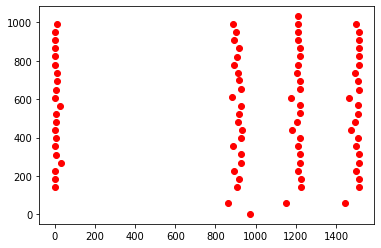

In [ ]:
plt.plot(l1,l2,'ro')

### Probamos haciendo clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
l=[(x[2],1) for x in anoTrain[0]['bbox']]

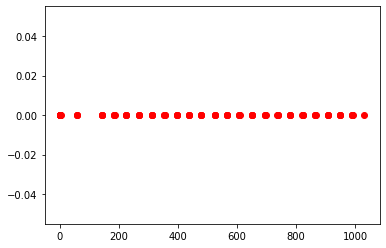

In [ ]:
plt.plot(l,[0 for i in range(0,len(l))],'ro')

In [ ]:
clustering = KMeans().fit(l)

In [ ]:
clustering.labels_

array([3, 7, 7, 2, 0, 1, 3, 7, 1, 4, 3, 4, 3, 4, 5, 4, 5, 1, 6, 3, 2, 1,
       0, 1, 4, 6, 1, 6, 1, 5, 2, 6, 0, 6, 5, 2, 0, 0, 2, 0, 4, 6, 7, 4,
       0, 2, 6, 2, 6, 6, 2, 1, 0, 3, 4, 4, 5, 3, 6, 3, 4, 2, 3, 4, 5, 2,
       3, 2, 4, 2, 0, 6, 3, 6, 5, 3, 1, 5, 0, 5, 5, 0, 1, 0, 1, 5, 5, 1,
       2], dtype=int32)

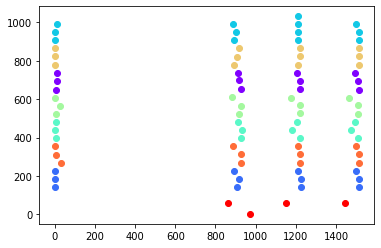

In [ ]:
import matplotlib.cm as cm

x = np.arange(len(l1))
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(clustering.labels_))))
for i in x:
    plt.scatter(l1[i], l2[i], color=colors[clustering.labels_[i]])

In [ ]:
l=[[x[0],x[2]] for x in anoTrain[0]['bbox']]

In [ ]:
clustering = KMeans().fit(l)

In [ ]:
clustering.labels_

array([1, 3, 0, 6, 6, 0, 1, 3, 3, 1, 7, 5, 0, 2, 4, 4, 4, 3, 1, 1, 4, 7,
       2, 1, 4, 3, 1, 1, 3, 4, 4, 7, 4, 0, 6, 6, 5, 4, 4, 5, 4, 1, 3, 0,
       4, 2, 0, 6, 0, 3, 2, 0, 5, 3, 5, 7, 2, 7, 3, 0, 1, 5, 0, 6, 6, 2,
       3, 5, 7, 5, 2, 7, 3, 7, 5, 7, 7, 2, 6, 2, 5, 2, 1, 6, 0, 6, 5, 7,
       2], dtype=int32)

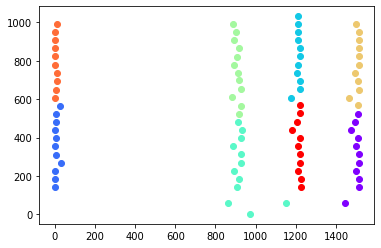

In [ ]:
x = np.arange(len(l1))
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(clustering.labels_))))
for i in x:
    plt.scatter(l1[i], l2[i], color=colors[clustering.labels_[i]])

In [ ]:
clustering = KMeans( n_clusters=4).fit(anoTrain[0]['bbox'])

In [ ]:
x = np.arange(len(l1))
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(clustering.labels_))))
for i in x:
    plt.scatter(l1[i], l2[i], color=colors[clustering.labels_[i]])

### Utilizamos las coordenadas

In [ ]:
l1=[x[0] for x in anoTrain[0]['bbox']]
l2.sort()
ant=l2[0]
i=0
filas=[[]]
for x in l2:
  if x< ant+5:
    filas[i].append(x)
  else:
    i+=1
    filas.append([x])
  ant=x

In [ ]:
filas

[[3],
 [59, 59, 60],
 [143, 143, 143, 144],
 [185, 185, 185, 186],
 [225, 226, 226, 226],
 [267, 268, 269, 270],
 [311, 313, 313, 313],
 [354, 354, 355, 355],
 [396, 397, 398, 398],
 [438, 438, 438, 439],
 [480, 480, 480, 480],
 [525, 525, 525, 526],
 [565, 566, 567, 568],
 [608, 608, 608, 609],
 [650, 650, 651, 651],
 [695, 696, 696, 697],
 [736, 738, 738, 738],
 [779, 779, 779, 780],
 [821, 822, 822, 823],
 [864, 864, 865, 866],
 [907, 907, 907, 907],
 [948, 949, 949, 949],
 [991, 991, 991, 992],
 [1031]]

In [ ]:
bbox=anoTrain[0]['bbox']
texto=anoTrain[0]['text']
ncol=max([len(x) for x in filas])
filav2=[x[0]//10 for x in filas]
xmin=[[] for i in range(0,len(filas))]
t=[[] for i in range(0,len(filas))]
for i in range(0, len(bbox)):
  if bbox[i][2]//10 in filav2:
    t[filav2.index(bbox[i][2]//10)].append(texto[i])
    xmin[filav2.index(bbox[i][2]//10)].append(bbox[i][0])
  else: 
    t[filav2.index( bbox[i][2]//10 -1)].append(texto[i])
    xmin[filav2.index(bbox[i][2]//10 -1)].append(bbox[i][0])
filas=[{'xmin':xmin[i], 'text':t[i], 'ncol':len(xmin[i])}  for i in range(0,len(xmin))]

In [ ]:
filas

[{'ncol': 1, 'text': ['THRESHOLD FOR RELEASE:'], 'xmin': [974]},
 {'ncol': 3,
  'text': ['to air  ka/vear', 'to land  ka/vear', 'to water  ka/vear'],
  'xmin': [863, 1446, 1151]},
 {'ncol': 4,
  'text': ['100', '1,1,1-trichloroethane', '', ''],
  'xmin': [907, 0, 1512, 1225]},
 {'ncol': 4,
  'text': ['50', '', '', '1,1,2,2-tetrachloroethan:'],
  'xmin': [917, 1513, 1224, 3]},
 {'ncol': 4,
  'text': ['10', '1000', '10', '1,2-dichloroethane (EDC)'],
  'xmin': [1501, 890, 1211, 0]},
 {'ncol': 4,
  'text': ['rominated diphenvlethers (PBDE', '1', '', '1'],
  'xmin': [32, 1511, 928, 1221]},
 {'ncol': 4,
  'text': ['Chloro-alkanes, C10-C1:', '1', '', '1'],
  'xmin': [8, 1511, 928, 1222]},
 {'ncol': 4,
  'text': ['1 000', 'Dichloromethane (DCM', '10', '1C'],
  'xmin': [889, 0, 1210, 1500]},
 {'ncol': 4,
  'text': ['Dieldrin', '1', '1', '1'],
  'xmin': [6, 927, 1509, 1220]},
 {'ncol': 4,
  'text': ['1000', '1000', 'Halogenated Oraanic Compounds (AOX)', ''],
  'xmin': [1182, 1472, 4, 930]},
 {'n

In [ ]:
ncol

4

In [ ]:
def transformFila(dic):
  d={dic['xmin'][i]:dic['text'][i] for i in range(0,len(dic['xmin']))}
  claves=list(d.keys())
  claves.sort()
  return [d[k] for k in claves]

In [ ]:
def transformTabla(listDic,filename):
  f = open (filename, "w")
  c='{'+' '.join(['c' for i in range(0,ncol)])+'} \n'
  f.write('\\begin{table} \n\\begin{tabular}'+c)
  for dic in listDic:
    f.write(' & '.join(transformFila(dic))+'\\\\ \n')
  f.write('\end{tabular} \n\end{table}')
  f.close()

In [ ]:
transformTabla(filas, 'prueba.txt')

In [ ]:
anoTrain[0]['file']

'datasetYOLO/train/eu-001-2-5.jpg'

In [ ]:
filas

[{'ncol': 1, 'text': ['THRESHOLD FOR RELEASE:'], 'xmin': [974]},
 {'ncol': 3,
  'text': ['to air  ka/vear', 'to land  ka/vear', 'to water  ka/vear'],
  'xmin': [863, 1446, 1151]},
 {'ncol': 4,
  'text': ['100', '1,1,1-trichloroethane', '', ''],
  'xmin': [907, 0, 1512, 1225]},
 {'ncol': 4,
  'text': ['50', '', '', '1,1,2,2-tetrachloroethan:'],
  'xmin': [917, 1513, 1224, 3]},
 {'ncol': 4,
  'text': ['10', '1000', '10', '1,2-dichloroethane (EDC)'],
  'xmin': [1501, 890, 1211, 0]},
 {'ncol': 4,
  'text': ['rominated diphenvlethers (PBDE', '1', '', '1'],
  'xmin': [32, 1511, 928, 1221]},
 {'ncol': 4,
  'text': ['Chloro-alkanes, C10-C1:', '1', '', '1'],
  'xmin': [8, 1511, 928, 1222]},
 {'ncol': 4,
  'text': ['1 000', 'Dichloromethane (DCM', '10', '1C'],
  'xmin': [889, 0, 1210, 1500]},
 {'ncol': 4,
  'text': ['Dieldrin', '1', '1', '1'],
  'xmin': [6, 927, 1509, 1220]},
 {'ncol': 4,
  'text': ['1000', '1000', 'Halogenated Oraanic Compounds (AOX)', ''],
  'xmin': [1182, 1472, 4, 930]},
 {'n

Mejorando lo que tenemos:

In [ ]:
l2=[x[2] for x in anoTrain[0]['bbox']] #cogemos solo los valores de ymin
l2.sort() #los ordenamos
ant=l2[0]
i=0
filas=[[]]
for x in l2:  #separamos en filas según los ymin. 
  if x< ant+3:
    filas[i].append(x)
  else:
    i+=1
    filas.append([x])
  ant=x

In [ ]:
filas

[[3],
 [59, 59, 60],
 [143, 143, 143, 144],
 [185, 185, 185, 186],
 [225, 226, 226, 226],
 [267, 268, 269, 270],
 [311, 313, 313, 313],
 [354, 354, 355, 355],
 [396, 397, 398, 398],
 [438, 438, 438, 439],
 [480, 480, 480, 480],
 [525, 525, 525, 526],
 [565, 566, 567, 568],
 [608, 608, 608, 609],
 [650, 650, 651, 651],
 [695, 696, 696, 697],
 [736, 738, 738, 738],
 [779, 779, 779, 780],
 [821, 822, 822, 823],
 [864, 864, 865, 866],
 [907, 907, 907, 907],
 [948, 949, 949, 949],
 [991, 991, 991, 992],
 [1031]]

In [ ]:
#caso particular
bbox=anoTrain[0]['bbox']
texto=anoTrain[0]['text']
ncol=max([len(x) for x in filas]) #buscamos el numero máximo de columnas
filav2=[x[0]//10 for x in filas]  #nos quedamos con las decenas de los ymin
xmin=[[] for i in range(0,len(filas))] #una lista por cada fila, almacenamos las coordenadas (xmin,xmax)
t=[[] for i in range(0,len(filas))] #una lista por cada fila, almacenamos el texto 
for i in range(0, len(bbox)):
  if bbox[i][2]//10 in filav2:
    t[filav2.index(bbox[i][2]//10)].append(texto[i])
    xmin[filav2.index(bbox[i][2]//10)].append((bbox[i][0]//10,bbox[i][1]//10))
  else: 
    t[filav2.index( bbox[i][2]//10 -1)].append(texto[i])
    xmin[filav2.index(bbox[i][2]//10 -1)].append((bbox[i][0]//10,bbox[i][1]//10))
#por cada fila creamos un diccionario con las coordenadas, el texto y el número de columnas de dicha fila
filas=[{'x':xmin[i], 'text':t[i], 'ncol':len(xmin[i])}  for i in range(0,len(xmin))]

In [ ]:
def filaNCOL(filas, ncol): #dado el diccionario de filas y un numero de columnas, devuelve las coordenadas 
  for f in filas:           # de una fila con nmax columnas
    if f['ncol']==ncol:
      y=f['x'].copy()
      y.sort()
      return y

In [ ]:
columnas=filaNCOL(filas, ncol)

In [ ]:
ncol

4

In [ ]:
columnas

[(0, 42), (90, 96), (122, 124), (151, 152)]

In [ ]:
filas[0]['x']

[(97, 147)]

In [ ]:
d={filas[4]['x'][i]:filas[4]['text'][i] for i in range(0,len(filas[4]['x']))}

In [ ]:
d

{(0, 48): '1,2-dichloroethane (EDC)',
 (89, 98): '1000',
 (121, 125): '10',
 (150, 154): '10'}

In [ ]:
claves=list(d.keys())
claves

[(150, 154), (89, 98), (121, 125), (0, 48)]

In [ ]:
claves.sort()
claves

[(0, 48), (89, 98), (121, 125), (150, 154)]

In [ ]:
filas[0]['x'][0]

(97, 147)

In [ ]:
(0,40)<filas[0]['x'][0]

True

In [ ]:
def transformFila(dic,columnas): #obtenemos el texto ordenado de dic
  d={dic['x'][i]:dic['text'][i] for i in range(0,len(dic['x']))}
  claves=list(d.keys())
  claves.sort()
  if len(claves)==len(columnas): #si el ncol de la fila es el máximo, no hay combinación de celdas
    return [d[k] for k in claves]
  else: #hay combinación de celdas
    i,j=0,0
    final=[]
    while j<len(columnas) and i<dic['ncol']:
      if claves[i][0]>columnas[j][0]+10: #comparamos los xmin 
        final.append('')
        j+=1
      else: 
        if claves[i][1]<=columnas[j][1]+10: #xmax coinciden
          final.append(d[claves[i]])
          i+=1
          j+=1
        else: #xmax no coinciden
          cont=1
          while j<len(columnas) and claves[i][1]>columnas[j][0]:
            cont+=1
            j+=1
          final.append('\multicolumn{'+str(cont)+'}{c} {'+ d[claves[i]]+'}')
          i+=1
    while j<len(columnas):
      final.append('')
      j+=1
    return final  

In [ ]:
filas[0]

{'ncol': 1, 'text': ['THRESHOLD FOR RELEASE:'], 'x': [(97, 147)]}

In [ ]:
columnas

[(0, 42), (90, 96), (122, 124), (151, 152)]

In [ ]:
transformFila(filas[1],columnas)

['', 'to air  ka/vear', 'to water  ka/vear', 'to land  ka/vear']

In [ ]:
' & '.join(transformFila(filas[1],columnas))

' & to air  ka/vear & to water  ka/vear & to land  ka/vear'

In [ ]:
def transformTabla(listDic,filename):
  ncol=max([f['ncol'] for f in listDic])
  columna=filaNCOL(listDic, ncol)
  f = open (filename, "w")
  c='{|'+'|'.join(['c' for i in range(0,ncol)])+'|} \n \hline \n'
  f.write('\\begin{table} \n\\begin{tabular}'+c)
  for dic in listDic:
    f.write(' & '.join(transformFila(dic,columna))+'\\\\ \n \hline \n')
  f.write('\end{tabular} \n\end{table}')
  f.close()

In [ ]:
transformTabla(filas, 'prueba.txt')

In [ ]:
def obtenerFilas(tabla):
  l2=[x[2] for x in tabla['bbox']]
  l2.sort() #los ordenamos
  ant=l2[0]
  i=0
  filas=[[]]
  for x in l2:  #separamos en filas según los ymin. 
    if x< ant+3:
      filas[i].append(x)
    else:
      i+=1
      filas.append([x])
    ant=x
  return filas

In [ ]:
def tablas(path):
  path_tablas=Path('tablas')
  %mkdir tablas
  anot=json.loads(open(path).read())
  for tabla in anot:
    filas=obtenerFilas(tabla)
    bbox=tabla['bbox']
    texto=tabla['text']
    ncol=max([len(x) for x in filas]) #buscamos el numero máximo de columnas
    filav2=[x[0]//10 for x in filas]  #nos quedamos con las decenas de los ymin
    xmin=[[] for i in range(0,len(filas))] #una lista por cada fila, almacenamos las coordenadas (xmin,xmax)
    t=[[] for i in range(0,len(filas))] #una lista por cada fila, almacenamos el texto 
    for i in range(0, len(bbox)):
      if bbox[i][2]//10 in filav2:
        t[filav2.index(bbox[i][2]//10)].append(texto[i])
        xmin[filav2.index(bbox[i][2]//10)].append((bbox[i][0]//10,bbox[i][1]//10))
      else: 
        t[filav2.index( bbox[i][2]//10 -1)].append(texto[i])
        xmin[filav2.index(bbox[i][2]//10 -1)].append((bbox[i][0]//10,bbox[i][1]//10))
    #por cada fila creamos un diccionario con las coordenadas, el texto y el número de columnas de dicha fila
    filas=[{'x':xmin[i], 'text':t[i], 'ncol':len(xmin[i])}  for i in range(0,len(xmin))]
    path_file=Path(tabla['file']).stem+'.txt'
    transformTabla(filas, path_tablas/path_file)

In [ ]:
tablas('bboxTrain.json')

In [ ]:
j=0
for f in anoTrain:
  if f['file']=='datasetYOLO/train/us-040-2-1.jpg':
    print(j)
  j+=1

3


In [ ]:
anoTrain[3]

{'bbox': [[884, 1016, 458, 495],
  [1564, 1621, 377, 415],
  [247, 365, 66, 104],
  [1556, 1631, 216, 254],
  [890, 1018, 129, 167],
  [911, 989, 216, 254],
  [6, 167, 379, 416],
  [1556, 1630, 458, 495],
  [913, 989, 536, 575],
  [4, 91, 216, 255],
  [914, 989, 296, 333],
  [912, 988, 379, 416],
  [6, 116, 458, 494],
  [1556, 1631, 537, 575],
  [1330, 1860, 128, 167],
  [1563, 1621, 296, 333],
  [4, 94, 537, 575],
  [1137, 1413, 2, 90],
  [9, 87, 297, 334]],
 'file': 'datasetYOLO/train/us-040-2-1.jpg',
 'text': ['Not done',
  '598',
  'Species',
  '1038',
  'GLWOI',
  '2880',
  'Kingfisher',
  '1498',
  '1920',
  'Mink',
  '1930',
  '1040',
  'Osprev',
  '1818',
  'Mercury Study Report to Congress',
  '7164',
  'Eagle',
  'Wildlife Criterion  (pg/L)',
  'Otter']}

In [ ]:
obtenerFilas(anoTrain[3])

[[2],
 [66],
 [128, 129],
 [216, 216, 216],
 [296, 296, 297],
 [377, 379, 379],
 [458, 458, 458],
 [536, 537, 537]]

In [ ]:
from astropy.table import Table
tab = Table.read('/content/tablas/eu-002-1-1.tex')

In [ ]:
tab

In [ ]:
Table.read('/content/tablas/eu-004-3-3.tex')

In [ ]:
l1=[x[0] for x in anoTrain[51]['bbox']]
l1.sort()
img=cv2.imread(anoTrain[51]['file'])
coef=(img.shape[0]*0.1)//10
ant=l1[0]
i=0
columns=[[]]
for x in l1:
  if x//10<= ant//10 +coef:
    columns[i].append(x)
  else:
    i+=1
    columns.append([x])
  ant=x

In [ ]:
print(l1)

In [ ]:
img=cv2.imread(anoTrain[0]['file'])

In [ ]:
img.shape[0]*0.1

In [ ]:
mostrarImagen(cv2.imread(anoTrain[51]['file']))

In [ ]:
len(columns)

In [ ]:
bbox=anoTrain[51]['bbox']
texto=anoTrain[51]['text']
ncol=max([len(x) for x in filas])
filav2=[x[0]//10 for x in filas]
xmin=[[] for i in range(0,len(filas))]
t=[[] for i in range(0,len(filas))]
for i in range(0, len(bbox)):
  if bbox[i][2]//10 in filav2:
    t[filav2.index(bbox[i][2]//10)].append(texto[i])
    xmin[filav2.index(bbox[i][2]//10)].append(bbox[i][0])
  else: 
    t[filav2.index( bbox[i][2]//10 -1)].append(texto[i])
    xmin[filav2.index(bbox[i][2]//10 -1)].append(bbox[i][0])
filas=[{'xmin':xmin[i], 'text':t[i], 'ncol':len(xmin[i])}  for i in range(0,len(xmin))]

In [ ]:
filas

### Construir filas y columnas

In [ ]:
img=cv2.imread(anoTrain[51]['file'])

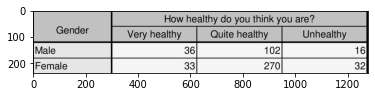

In [ ]:
mostrarImagen(img)

- Columnas

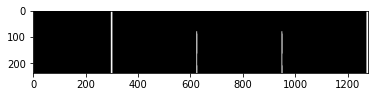

In [ ]:
kernel = np.ones((40,1))
columnas = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
(T,columnas) = cv2.threshold(columnas, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
columnas = cv2.erode(columnas,kernel = kernel)
mostrarImagen(columnas)

- Filas

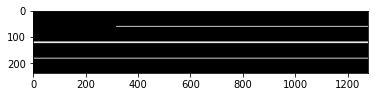

In [ ]:
kernel = np.ones((1,40))
filas = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
(T,filas) = cv2.threshold(filas, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
filas = cv2.erode(filas,kernel = kernel)
mostrarImagen(filas)

- Tabla limpia

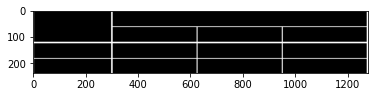

In [ ]:
kernel = np.ones((40,40))
tabla = filas + columnas
tabla = cv2.morphologyEx(tabla, cv2.MORPH_CLOSE, kernel)
mostrarImagen(tabla)

### Construir filas y columnas
#### Para tablas sin bordes

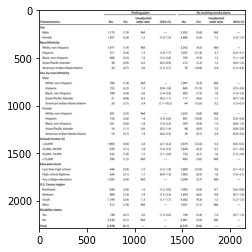

In [ ]:
img=cv2.imread(anoTrain[43]['file'])
mostrarImagen(img)

- Columnas

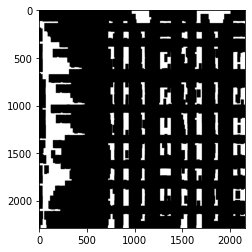

In [ ]:
kernel = np.ones((10,1))
columnas = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
(T,columnas) = cv2.threshold(columnas, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
columnas = cv2.erode(columnas,kernel = kernel)
columnas = cv2.dilate(columnas,kernel = kernel)
rectKernel=cv2.getStructuringElement(cv2.MORPH_RECT,(30,80))
columnas = cv2.morphologyEx(columnas,cv2.MORPH_CLOSE,rectKernel)
mostrarImagen(columnas)

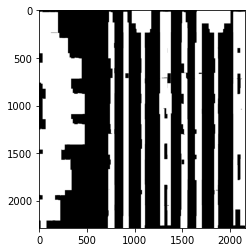

In [ ]:
columnas = cv2.dilate(columnas,kernel = np.ones((100,1)),iterations=2)
mostrarImagen(columnas)

- Filas

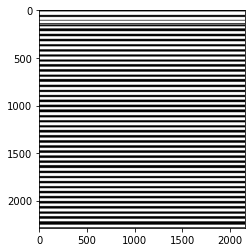

In [ ]:
kernel = np.ones((5,1))
filas = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
(T,filas) = cv2.threshold(filas, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
filas = cv2.erode(filas,kernel = kernel)
filas = cv2.dilate(filas,kernel = kernel)
rectKernel=cv2.getStructuringElement(cv2.MORPH_RECT,(5000,5))
filas = cv2.morphologyEx(filas,cv2.MORPH_CLOSE,rectKernel)
mostrarImagen(filas)

- Tabla limpia

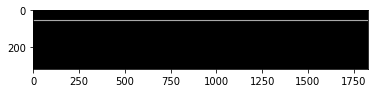

In [ ]:
kernel = np.ones((40,40))
tabla = filas + columnas
tabla = cv2.morphologyEx(tabla, cv2.MORPH_CLOSE, kernel)
mostrarImagen(tabla)

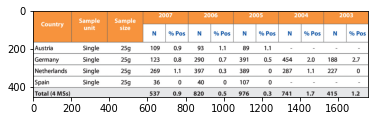

In [ ]:
img=cv2.imread(anoTrain[47]['file'])
mostrarImagen(img)

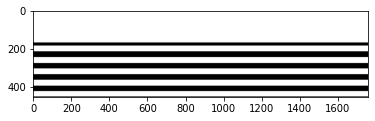

In [ ]:
kernel = np.ones((5,1))
filas = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
(T,filas) = cv2.threshold(filas, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
filas = cv2.erode(filas,kernel = kernel)
filas = cv2.dilate(filas,kernel = kernel)
rectKernel=cv2.getStructuringElement(cv2.MORPH_RECT,(5000,5))
filas = cv2.morphologyEx(filas,cv2.MORPH_CLOSE,rectKernel)
mostrarImagen(filas)